In [1]:
#   import necessary dependencies
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, fowlkes_mallows_score

print("dependencies imported")

dependencies imported


In [2]:
#   load the data and pca it

digits = datasets.load_digits()

thing = pd.DataFrame(digits.target)
#
pca = PCA(n_components=2)

data = StandardScaler().fit_transform(digits.data)
principalData = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalData, columns = ['principal component 1', 'principal component 2'])
principalDf.insert(2, 'Number', pd.DataFrame(thing))

principalDf

,principal component 1,principal component 2,Number
0,1.914214,-0.954485,0
1,0.588978,0.924630,1
2,1.302033,-0.317201,2
3,-3.020774,-0.868774,3
4,4.528947,-1.093466,4
...,...,...,...
1792,0.104336,0.255035,9
1793,2.423236,-1.429613,0
1794,1.022593,-0.147898,8
1795,1.076056,-0.380902,9


In [3]:
#   k-means algorithm copy-pasted from A3P1 then adjusted slightly to work with non 2d data

# determine distance b/w 2 points
# p1, p2 are arrays [xval, yval,...,...]
def getDist(p1, p2):
    xdif = p2[0] - p1[0]
    ydif = p2[1] - p1[1]
    psum = xdif**2 + ydif**2
    return psum**0.5
    # return np.linalg.norm(np.array(p1) - np.array(p2))

# assign points to clusters based on centroids
# centroids is an array containing k number of points that will act as centers of our clusters
# array is the array containing our data
def formClusters(centroids, array):
    clusters = [[] for i in range(len(centroids))]

    # assign each point to the cluster of the closest centroid
    for i in range(array.shape[0]):
        closestIndex = 0
        currPoint = list(array[i])
        for j in range(len(centroids)):
            if(getDist(currPoint, centroids[j]) < getDist(currPoint, centroids[closestIndex])):
                closestIndex = j
        
        clusters[closestIndex].append(array[i])
    
    return clusters

# clusters = formClusters([[.5, 0], [1.5, 0], [2.5, 0], [3.5, 0]], array)
# for i in range(len(clusters)):
#     print("Cluster {}:".format(i))
#     print(np.array(clusters[i]).shape)
#     print("\n")

# generate new centroids based on each cluster's mean value
def genCentroids(clusters):
    centroids = []

    for cluster in clusters:
        df = pd.DataFrame(cluster)
        df.dropna(inplace=True)
        centroids.append(df.mean(axis=0).values.tolist())

    return centroids

# code that plots shit

# def plot(clusters):
#     df = pd.DataFrame(columns = ['X', 'Y', 'Cluster'])
#     for i in range(len(clusters)):
#         cluster = clusters[i]
#         cdf = pd.DataFrame(cluster, columns = ['X', 'Y'])
#         cdf.insert(2, 'Cluster', "Cluster {}".format(i+1))
#         df = df.append(cdf, ignore_index=True)

#     groups = df.groupby('Cluster')
#     for name, group in groups:
#         plt.plot(group['X'], group['Y'], marker='o', linestyle='', label=name)

#     plt.legend()
#     plt.xlabel('Length')
#     plt.ylabel('Width')
#     plt.show()
#     plt.close()

def plot(clusters):
    allClusterDf = pd.DataFrame(columns=['principal component 1', 'principal component 2', 'cluster'])
    pred = []
    for cluster in clusters:
        clusterDf = pd.DataFrame(cluster, columns=['principal component 1', 'principal component 2', 'number'])
        numMode = clusterDf[['number']].mode()
        tempDf = clusterDf.copy(deep=True)
        tempDf = tempDf.rename(columns={'number' : 'cluster'})
        tempDf['cluster'].values[:] = numMode
        pred.append(tempDf.to_numpy())
        allClusterDf = allClusterDf.append(tempDf, ignore_index=True)
    
    groups = allClusterDf.groupby('cluster')
    for name, group in groups:
        plt.plot(group['principal component 1'], group['principal component 2'], marker='o', linestyle='', label=name)

    plt.legend()
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.show()
    plt.close()

    return np.array(pred)

def kmeansalgo(array, k=4, iterations=100):
    iterationSTDs = []

    indices = np.random.randint(0, array.shape[0], k)
    centroids = array[indices]
    # print(centroids)
    clusters = formClusters(centroids, array)
    print("Initial Clusters:")
    plot(clusters)
    for i in range(iterations):
        centroids = genCentroids(clusters)
        # print(centroids)
        clusters = formClusters(centroids, array)

    print("Final Clusters:")
    pred = plot(clusters)
    return clusters, pred

Initial Clusters:


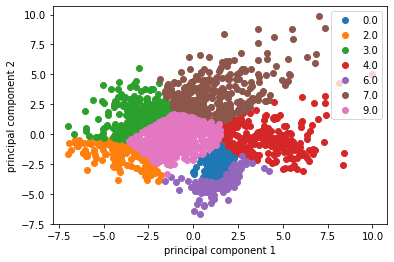

Final Clusters:


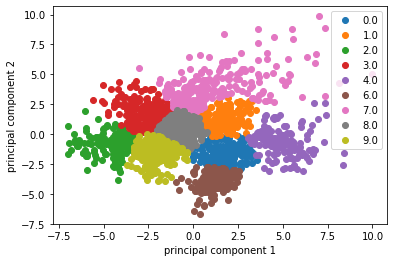

In [6]:
results = kmeansalgo(principalDf.to_numpy(), k=10)

# compute confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(clusters, pred)

In [7]:
#   P3.a (i, ii, iii)
np.set_printoptions(threshold=500)
actualClusters = results[0]
actualData = []
for cluster in actualClusters:
    for data in cluster:
        actualData.append(data)

# print(np.array(actualData))

predClusters = results[1]
predData = []
for cluster in predClusters:
    for data in cluster:
        predData.append(data)

# print("-----")
# print(np.array(predData))

actualDf = pd.DataFrame(data=actualData, columns=['pc1', 'pc2', 'number'])
actualDf = actualDf.sort_values(['pc1', 'pc2'])
actualData = actualDf[['number']].to_numpy().flatten()

# print("*********")
# print(actualData)

predDf = pd.DataFrame(data=predData, columns=['pc1', 'pc2', 'number'])
predDf = predDf.sort_values(['pc1', 'pc2'])
predData = predDf[['number']].to_numpy().flatten()
# print("-----")
# print(predData)

res = len(set(actualData) & set(predData)) / float(len(set(actualData) | set(predData))) * 100
print("Actual vs. Predicted Data Array % Similarity:")
print("{}%".format(res))
print("Confusion Matrix:")
print(confusion_matrix(actualData, predData))
print("Fowlkes-Mallows Score:")
print(fowlkes_mallows_score(actualData, predData))

Actual vs. Predicted Data Array % Similarity:
90.0%
Confusion Matrix:
[[126   6   0   0   5   0  38   0   1   2]
 [  5  76   0   0   0   0   2  11  61  27]
 [  1   8 103  16   0   0   0   1  11  37]
 [  4   0  37  76   0   0   0  15  10  41]
 [ 12   8   0   2 151   0   0   7   1   0]
 [  8  16   2  60   1   0   0  14  59  22]
 [ 22   1   0   0   0   0 158   0   0   0]
 [  0  12   0  12   0   0   0 148   7   0]
 [  8  28   2  25   0   0   0  10  78  23]
 [  2   8   7  15   0   0   0  30  63  55]]
Fowlkes-Mallows Score:
0.41293062406276243
